<h1><b><font color = 'brown' size = '6'>
Finding Text Similarity – Application of Feature Extraction
</font></b></h1>

<h2>
<b>

<ul>
<font color = 'brown green' size = '5'>

<li>
So far in this course, we have learned how to generate vectors from text. These
vectors are then fed to machine learning algorithms to perform various tasks.
</li><br>

<li>
Other than using them in machine learning applications, we can also perform simple NLP tasks using these vectors. Finding the string similarity is one of them.
</li><br>

<li>
This is a technique in which we find the similarity between two strings by converting them into vectors. The technique is mainly used in full-text searching.
</li><br>

<li>
There are different techniques for finding the similarity between two strings or texts.
</li><br>

<li>
They are explained one by one here:
</li>

</font>
</ul>
</b>
</h2>

<h2>
<b>
<ul>
<font color = 'brown green' size = '5'>

<li>
<font color = 'red'>Cosine similarity:</font> The cosine similarity is a technique to find the similarity
between the two vectors by calculating the cosine of the angle between them.
</li><br>

<li>
As we know, the cosine of a zero-degree angle is 1 (meaning the cosine similarity of two identical vectors is 1), while the cosine of 180 degrees is -1 (meaning the cosine of two opposite vectors is -1).
</li><br>

<li>
Thus, we can use this cosine angle to find the similarity between the vectors from 1 to -1.
</li><br>

<li>
To use this technique in finding text similarity, we convert text into vectors using one of the previously discussed techniques and find the similarity between the vectors of the text. This is calculated as follows:
</li>

</font>
</ul>

</font>
</ul>
</b>
</h2>

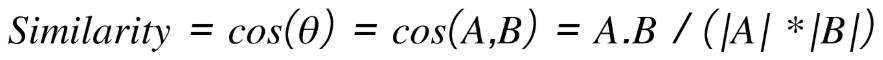

<h2>
<b>
<ul>
<font color = 'brown green' size = '5'>

<li>
Here, A and B are two vectors, A.B is the dot product of two vectors, and |A| and |B| are the magnitude of two vectors.
</li>
<hr>
</font>
</ul>

</font>
</ul>
</b>
</h2>

<h2>

<b>
<ul>
<font color = 'brown green' size = '5'>

<li>
<font color = 'red'>Jaccard similarity:</font> This is another technique that's used to calculate the
similarity between the two texts, but it only works on BoW vectors.
</li><br>

<li>
The Jaccard similarity is calculated as the ratio of the number of terms that are common between two text documents to the total number of unique terms present in those texts.
</li><br>

<li>
Consider the following example. Suppose there are two texts:
</li><br>

<li>
Text 1: I like detective Byomkesh Bakshi.
</li><br>

<li>
Text 2: Byomkesh Bakshi is not a detective; he is a truth seeker.
</li><br>

<li>
The common terms are "Byomkesh," "Bakshi," and "detective." The number of common terms in the texts is three.
</li><br>

<li>
The unique terms present in the texts are "I," "like," "is," "not," "a," "he," "is," "truth," and "seeker." So, the number of unique terms is nine.
</li><br>

<li>
Therefore, the Jaccard similarity is 3/9 = 0.3.
</li><br>

</font>
</ul>

</font>
</ul>
</b>
</h2>

<h1><b><font color = 'brown' size = '6'>
Exercise 01: Calculating Text Similarity Using Jaccard and Cosine Similarity
</font></b></h1>

In this exercise, we will calculate the Jaccard and cosine similarity for a given pair of texts. Follow these steps to complete this exercise

1. Open a Jupyter Notebook.

2. Insert a new cell and add the following code to import the necessary packages:

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')  # a Python command that downloads the "punkt" tokenizer models for the Natural Language Toolkit (NLTK) library.
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') #  used to download the WordNet corpus from the Natural Language Toolkit (NLTK) library in Python
nltk.download('omw-1.4') # The Open Multilingual WordNet (OMW) is a resource that provides word meanings, translations, and other linguistic information in multiple languages.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

lematizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


3. Create a function to extract the Jaccard similarity between a pair of sentences by adding the following code:

In [ ]:
def extract_text_similarity_jaccard(text1, text2):

  lematizer = WordNetLemmatizer()

  words_text1 = [lematizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
  words_text2 = [lematizer.lemmatize(word.lower()) for word in word_tokenize(text2)]

  nr = len(set(words_text1).intersection(set(words_text2)))
  dr = len(set(words_text1).union(set(words_text2)))
  jaccard_sim = nr / dr

  return jaccard_sim

4. Declare three variables named **pair1**, **pair2**, and **pair3**, as follows.

In [ ]:
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

5. To check the Jaccard similarity between the statements in **pair1**, write the following code:

In [ ]:
extract_text_similarity_jaccard(pair1[0], pair1[1])

0.14285714285714285

6. To check the Jaccard similarity between the statements in **pair2**, write the following code:

In [ ]:
extract_text_similarity_jaccard(pair2[0], pair2[1])

0.0

7. To check the Jaccard similarity between the statements in **pair3**, write the following code:

In [ ]:
extract_text_similarity_jaccard(pair3[0], pair3[1])

0.6

8. To check the cosine similarity, use the **TfidfVectorizer()** method to get the vectors of each text:

In [ ]:
def get_tf_idf_vectors(corpus):

  tfidf_vectorizer = TfidfVectorizer()
  tfidf_results = tfidf_vectorizer.fit_transform(corpus).todense()

  return tfidf_results

9. Create a corpus as a list of texts and get the TFIDF vectors of each text document. Add the following code to do this:

In [ ]:
corpus = [pair1[0], pair1[1], pair2[0], pair2[1], pair3[0], pair3[1]]
tf_idf_vectors = get_tf_idf_vectors(corpus)
tf_idf_vectors

matrix([[0.        , 0.        , 0.41923309, 0.        , 0.41923309,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.41923309, 0.        , 0.68755426, 0.        ],
        [0.54677906, 0.54677906, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.44836665, 0.44836665],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.40824829, 0.40824829, 0.        ,
         0.40824829, 0.        , 0.40824829, 0.40824829, 0.40824829,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.38996741, 0.        , 0.        , 0.        ,
         0.        , 0.56328241, 0.        , 0.        , 0.        

10. To check the cosine similarity between the initial two texts, write the
following code:

In [ ]:
cosine_similarity(np.array(tf_idf_vectors[0]), np.array(tf_idf_vectors[1]))

array([[0.3082764]])

11. To check the cosine similarity between the third and fourth texts, write the following code:

In [ ]:
cosine_similarity(np.array(tf_idf_vectors[2]), np.array(tf_idf_vectors[3]))

array([[0.]])

12. To check the cosine similarity between the fifth and sixth texts, write the following code:

In [ ]:
cosine_similarity(np.array(tf_idf_vectors[4]), np.array(tf_idf_vectors[5]))

array([[0.80368547]])